In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, roc_curve, ConfusionMatrixDisplay)


# Project introduction 


Customer churn is a critical issue for businesses, especially in the subscription and financial sectors. Understanding why customers leave and predicting who is likely to churn enables proactive retention strategies. In this project, we use machine learning to predict customer churn based on behavior and demographic features. The dataset has been retrieved from 

The purpose of this study is to support my training and development in machine learning by working through a complete, practical churn prediction project.

### Steps to follow


* **Clean and Prepare Dataset**
  We will start by cleaning the dataset, handling missing values, encoding categorical variables, and preparing the data for analysis.

* **Data Exploration**
  We will explore how the variables relate to each other, examine the distribution of values, and visualize key patterns using plots and graphs.

* **Feature Engineering**
  We will create, transform, or modify features as needed to improve model performance.

* **Model Building**
  We will train several simple machine learning models to predict the target variable:

  * Logistic Regression
  * Random Forest
  * Decision Tree
  * Support Vector Machine (SVM)
  * K-Nearest Neighbors (KNN)

* **Hyperparameter Optimization**
  Using Randomized Grid Search, we will tune model parameters to improve performance.

* **Feature Selection**
  We will apply various techniques to identify and select the most relevant features for predicting the target variable.

* **Evaluate the Results**
  We will assess the performance of our models using appropriate evaluation metrics and compare their effectiveness.



## Data Overview


In [52]:
churn = pd.read_csv("churn.csv", index_col="CustomerId")
churn.shape

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


(10000, 13)

Our dataset contains 10000 observations and 13 varaibles. Let's see how the first observations look.

In [53]:
churn.head(5)

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,,
15634602,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


We have both numerical and string variables.

In [54]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [55]:
churn.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [56]:
for col in churn.select_dtypes(include="object").columns:
    print(churn[col].value_counts())

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64


## Data Cleaning

In the previous section, with `.info()`, we found no nulls, we can check whether there are any NA's and drop duplicates, in case any are present.

In [58]:
print(churn.isna().sum())
churn.drop_duplicates(inplace=True)

RowNumber          0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


We have no nulls or NAs in our dataset, and any duplicates should have been removed, allowing us to proceed with our data exploration.

## Exploratory Data Analysis (EDA)

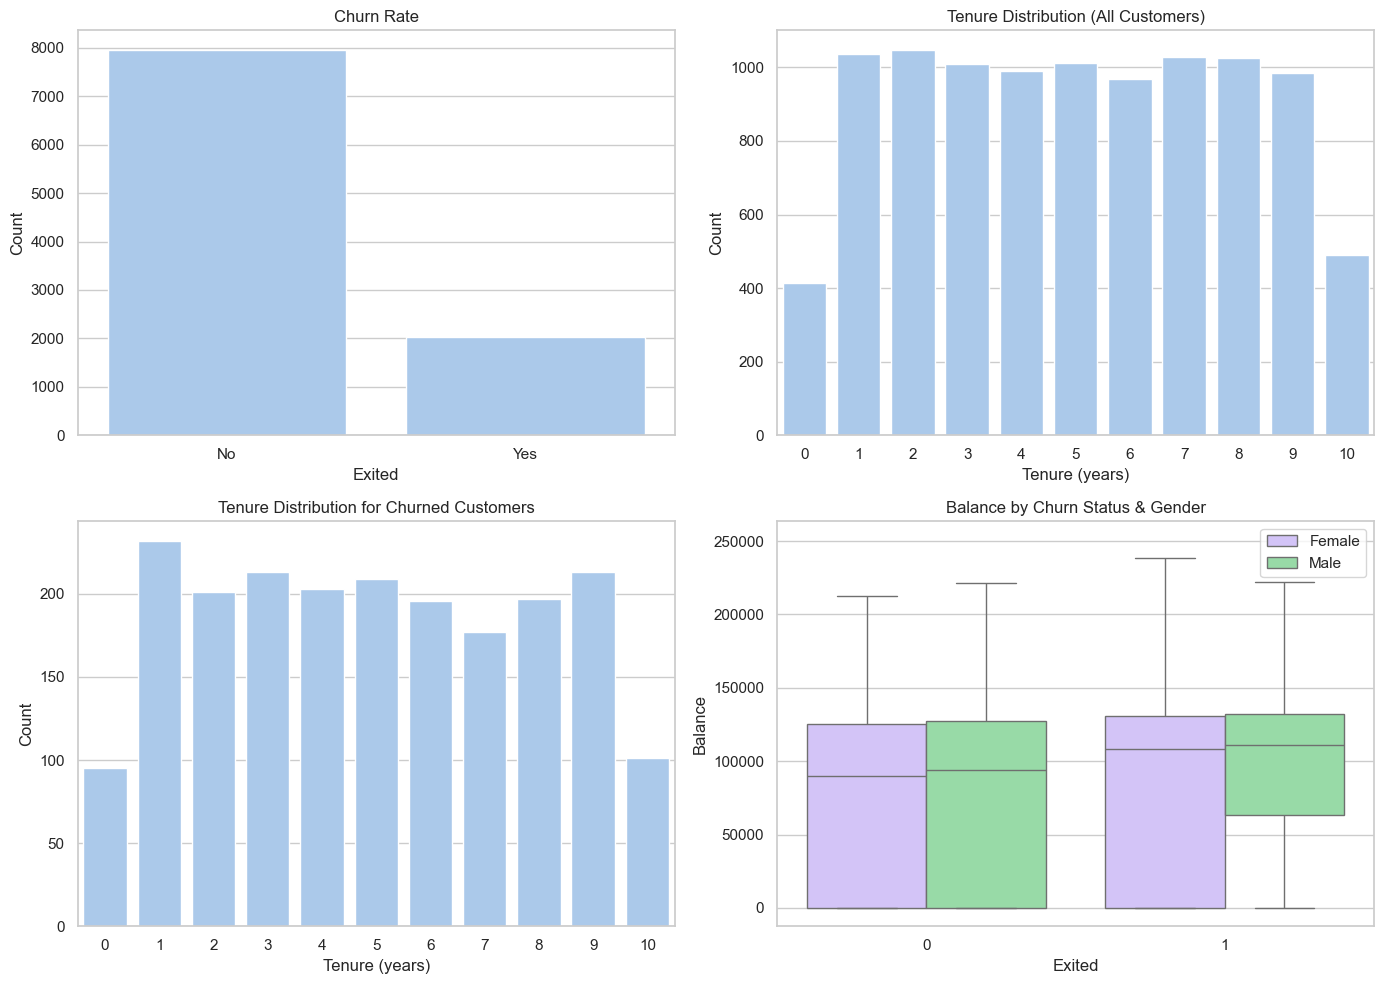

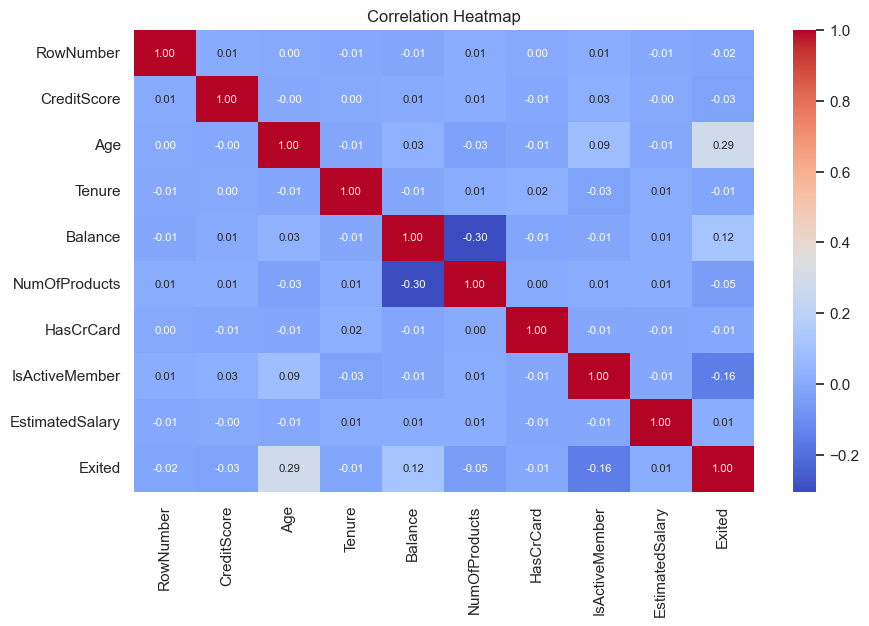

In [67]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set up a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten to access with a single index

# BARPLOT: Churn Rate
sns.barplot(ax=axes[0], x=['No', 'Yes'], y=churn['Exited'].value_counts().values)
axes[0].set_title('Churn Rate')
axes[0].set_xlabel('Exited')
axes[0].set_ylabel('Count')

# BARPLOT: Tenure Distribution (all customers)
tenure_all = churn['Tenure'].value_counts().sort_index()
sns.barplot(ax=axes[1], x=tenure_all.index, y=tenure_all.values)
axes[1].set_title('Tenure Distribution (All Customers)')
axes[1].set_xlabel('Tenure (years)')
axes[1].set_ylabel('Count')

# BARPLOT: Tenure distribution for churned customers only (Exited == 1)
tenure_exited_1 = churn[churn['Exited'] == 1]
tenure_counts_exited_1 = tenure_exited_1['Tenure'].value_counts().sort_index()
sns.barplot(ax=axes[2], x=tenure_counts_exited_1.index, y=tenure_counts_exited_1.values)
axes[2].set_title('Tenure Distribution for Churned Customers')
axes[2].set_xlabel('Tenure (years)')
axes[2].set_ylabel('Count')

# BOXPLOT: Balance by Churn Status & Gender
sns.boxplot(ax=axes[3], x='Exited', y='Balance', hue='Gender', data=churn, palette=['m', 'g'])
axes[3].set_title('Balance by Churn Status & Gender')
axes[3].legend(loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
corr = churn.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.show()



These plots help us gain valuable insights into the data before performing feature engineering.

* **Churn Rate Plot**: We observe that the positive class (`Exited = 1`) is the minority, which could pose challenges for our models in predicting churned customers — the very outcome we're most interested in. This class imbalance suggests that applying a class-balancing technique (such as oversampling, undersampling, or SMOTE) might be necessary to improve model performance.

* **Tenure Distribution Plots**: The second plot shows the overall distribution of customers by tenure (years of staying with the company), while the third plot specifically focuses on those who have exited. These plots help us assess whether tenure might be a useful predictor. At this stage, however, there doesn’t appear to be a clear correlation between tenure and churn.

* **Balance by Churn Status & Gender (Boxplot)**: This plot reveals some subtle patterns. Among customers who did not churn, the balance distributions for males and females are fairly similar. However, among those who did churn, male customers exhibit a different distribution — while their average balance and range remain comparable, the lower quantile appears to shift upward. This may suggest that certain male customers with moderately high balances are more prone to leaving, whereas for females, it does not seem to be a contributing factor.

* **Correlation Matrix**: We did not find any strong correlations among the variables. The most notable is a **moderate positive correlation of 0.29** between **Age** and **Exited**, suggesting that older customers may be slightly more likely to churn. The strongest negative correlation observed is **-0.30** between **Balance** and **Number of Products**, indicating that customers with higher balances tend to hold fewer products. Overall, the correlations are **moderate at best or negligible**, suggesting limited linear relationships between most variables.



## Feature Engineering

In this step, we will adapt certain variables and remove those that are not useful for prediction. We will also normalize the data, as this can help improve the performance of our models.

In [22]:
churn = churn.drop(["RowNumber", "Surname"], axis=1) # These varaibles are not useful for our analysis

churn['Gender']=churn['Gender'].map({'Male':0, 'Female':1}) # To binary

churn = pd.get_dummies(churn, columns=['Geography'], drop_first=True, dtype=int) # One-hot encoding

churn[['HasCrCard', 'IsActiveMember', 'Exited', 'Gender']]=churn[['HasCrCard', 'IsActiveMember', 'Exited', 'Gender']].astype('category')
# To category


# Normalization
scaler = MinMaxScaler()
num_cols = churn.select_dtypes(include='number').columns
churn[num_cols] = scaler.fit_transform(churn[num_cols])




## Model Building

In [24]:
# Train test split

y = churn['Exited']
X = churn.drop(columns='Exited')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

#Correction unbalanced classes using SMOTE
smote=SMOTE(random_state=2025)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"Orifinal dataset shape:{y_train.value_counts()}")
print(f"Resampled dataset shape:{y_train_res.value_counts()}")

Orifinal dataset shape:Exited
0    6370
1    1630
Name: count, dtype: int64
Resampled dataset shape:Exited
0    6370
1    6370
Name: count, dtype: int64



========== Logistic Regression ==========
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1593
           1       0.38      0.71      0.50       407

    accuracy                           0.71      2000
   macro avg       0.64      0.71      0.65      2000
weighted avg       0.80      0.71      0.73      2000



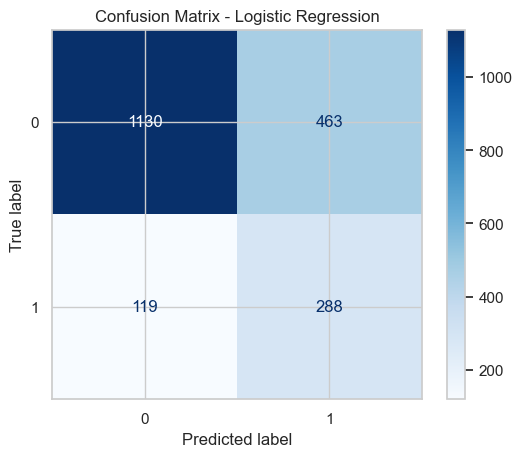


========== Random Forest ==========
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1593
           1       0.64      0.63      0.64       407

    accuracy                           0.85      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.85      0.85      0.85      2000



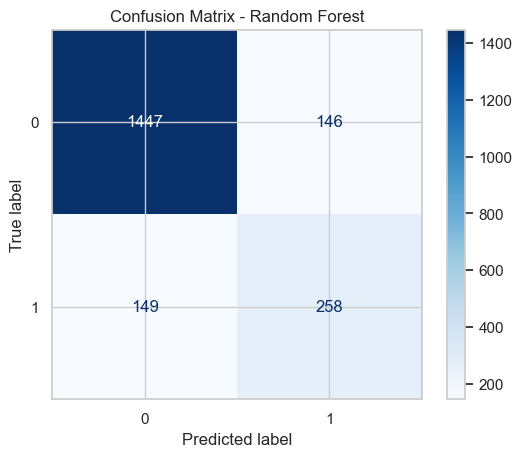


========== Decision Tree ==========
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1593
           1       0.46      0.57      0.51       407

    accuracy                           0.78      2000
   macro avg       0.67      0.70      0.68      2000
weighted avg       0.80      0.78      0.78      2000



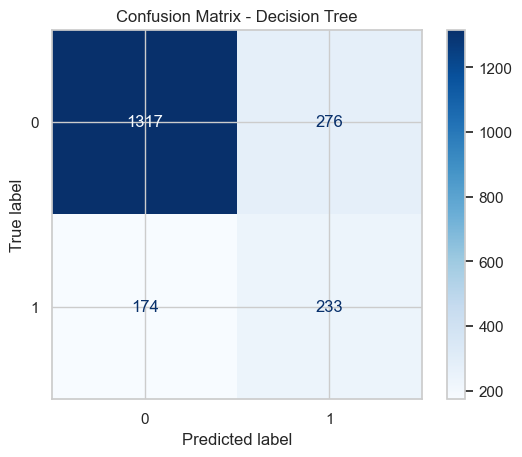


========== Support Vector Machine ==========
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.50      0.73      0.60       407

    accuracy                           0.80      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.84      0.80      0.81      2000



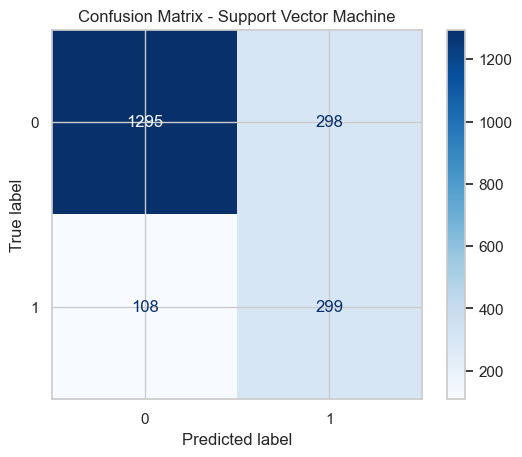


========== K-Nearest Neighbors ==========
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1593
           1       0.39      0.67      0.49       407

    accuracy                           0.72      2000
   macro avg       0.64      0.70      0.65      2000
weighted avg       0.79      0.72      0.74      2000



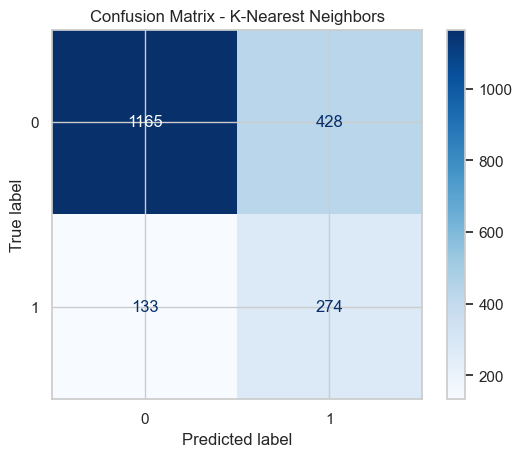

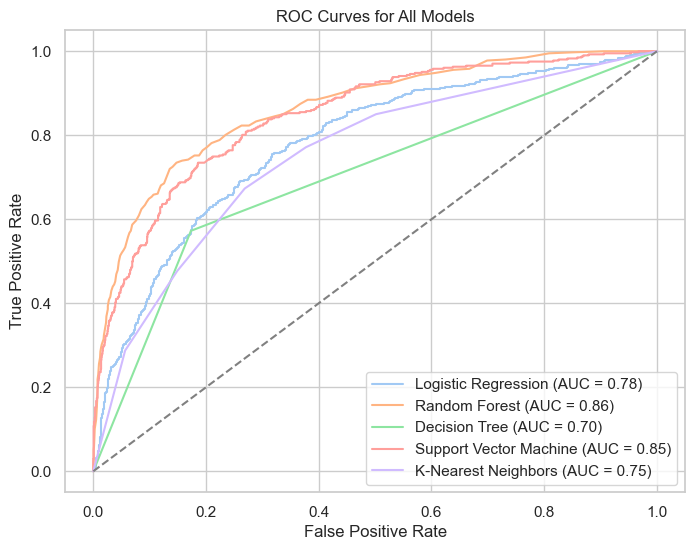

In [25]:

# We will be iterating the fitting and evaluation processes for all the models

# Dictionary of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# ROC values for plotting
roc_data = {}

# Loop through models
for name, model in models.items():
    print(f"\n{'='*10} {name} {'='*10}") # Title of the model
    
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]

    # Classification Report
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # ROC Curve values
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = roc_auc_score(y_test, y_probs)
    roc_data[name] = (fpr, tpr, roc_auc)

# ROC Curves 
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.grid(True)
plt.show()


Overall, the models demonstrate moderate to strong performance in terms of accuracy, with Random Forest achieving the best results at 85%, followed by SVM at 80%. These models show promise, particularly Random Forest, which maintains a good balance between precision and recall across both classes. However, despite applying class balancing using SMOTE, performance on the minority class (churned customers) remains a significant challenge all across the board. While some models like SVM and Logistic Regression achieve high recall for the churn class, they do so at the cost of low precision, leading to many false positives. This suggests that the issue is not just class imbalance in numbers, but potentially overlapping class distributions, insufficiently predictive features, or the limitations of synthetic data generated by SMOTE. The correlations among features are generally low, indicating that the existing variables may not capture the churn behavior effectively. As a result, even with SMOTE in place, the models struggle to clearly distinguish churners from non-churners. 

## Hyperparameter tuning with Random Grid Search


Tuning: Logistic Regression
Best Params: {'C': 10, 'solver': 'liblinear'}

Tuning: Random Forest
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Tuning: Decision Tree
Best Params: {'max_depth': None, 'min_samples_split': 2}

Tuning: Support Vector Machine
Best Params: {'C': 10, 'kernel': 'rbf'}

Tuning: K-Nearest Neighbors
Best Params: {'n_neighbors': 3, 'weights': 'distance'}

========== Logistic Regression ==========
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1593
           1       0.38      0.71      0.50       407

    accuracy                           0.71      2000
   macro avg       0.64      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



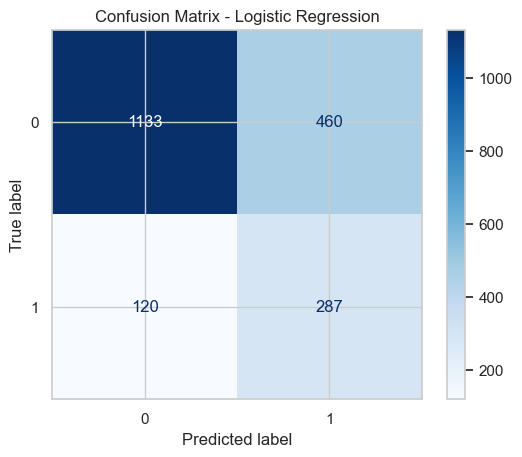


========== Random Forest ==========
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1593
           1       0.64      0.63      0.63       407

    accuracy                           0.85      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.85      0.85      0.85      2000



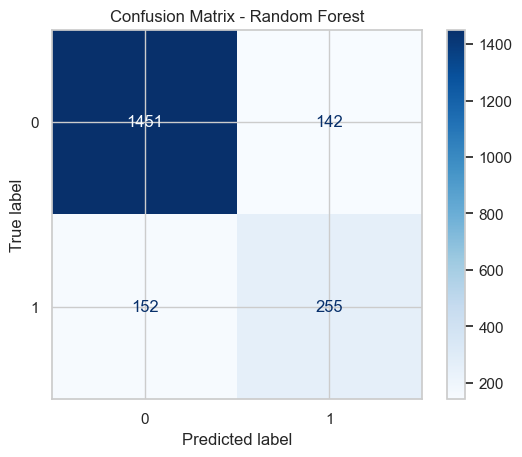


========== Decision Tree ==========
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1593
           1       0.47      0.57      0.51       407

    accuracy                           0.78      2000
   macro avg       0.68      0.70      0.69      2000
weighted avg       0.80      0.78      0.79      2000



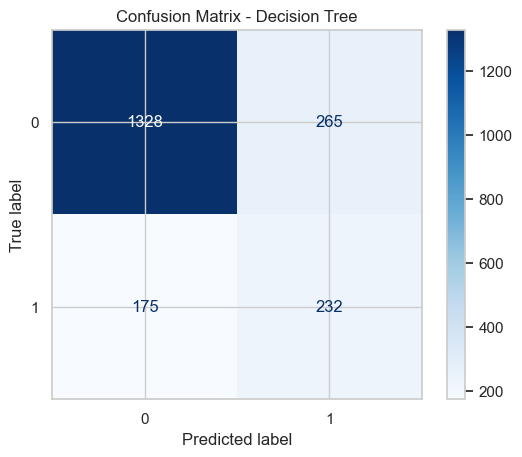


========== Support Vector Machine ==========
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1593
           1       0.49      0.73      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.79      0.80      2000



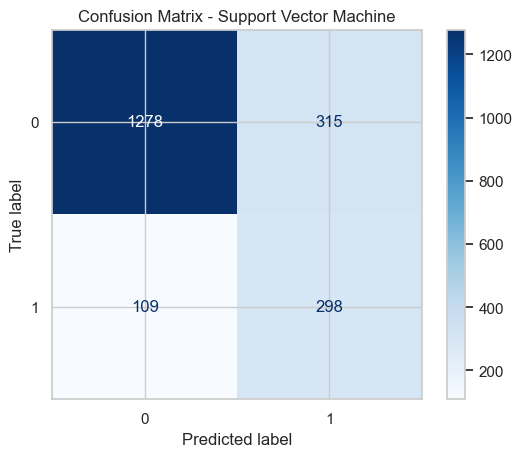


========== K-Nearest Neighbors ==========
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1593
           1       0.41      0.60      0.49       407

    accuracy                           0.74      2000
   macro avg       0.65      0.69      0.66      2000
weighted avg       0.79      0.74      0.76      2000



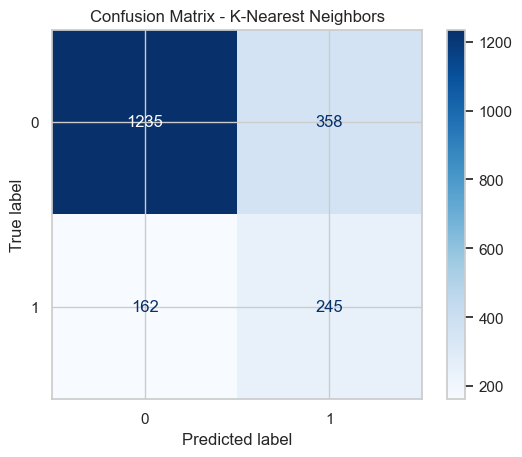

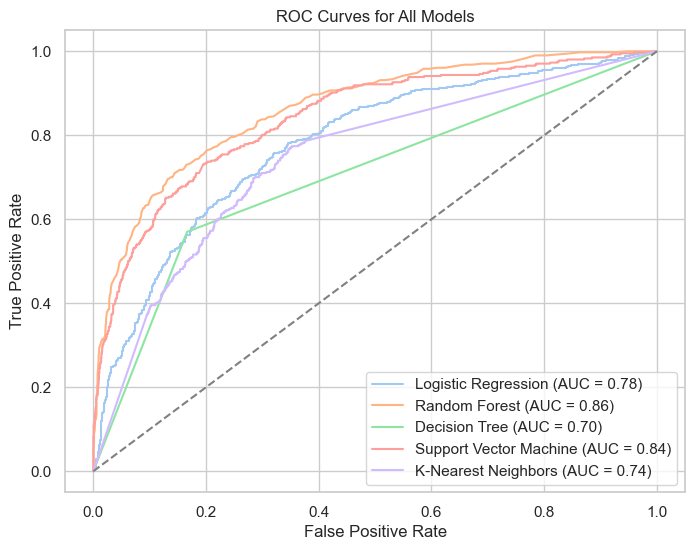

In [26]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
}

# Dictionary of base models
base_models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Store best models
best_models = {}

for name in base_models:
    print(f"\nTuning: {name}")
    grid = GridSearchCV(base_models[name], param_grids[name], cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train_res, y_train_res)
    
    print(f"Best Params: {grid.best_params_}")
    best_models[name] = grid.best_estimator_

# Now use best_models dict in your evaluation loop

# Store ROC values for plotting
roc_data = {}

# Loop through models
for name, model in best_models.items():
    print(f"\n{'='*10} {name} {'='*10}") # Title of the model
    
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]

    # Classification Report
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # ROC Curve values
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = roc_auc_score(y_test, y_probs)
    roc_data[name] = (fpr, tpr, roc_auc)

# Plot all ROC Curves together
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.grid(True)
plt.show()


After applying Random Grid Search for hyperparameter tuning, the models show some improvements in their classification performance, though the overall trends remain similar. The Random Forest model continues to lead with the highest accuracy (85%) and balanced precision and recall for both classes, maintaining its status as the best performer. Logistic Regression and SVM retain relatively high recall for the minority churn class, but their precision remains low, indicating persistent challenges with false positives. Notably, the Decision Tree and K-Nearest Neighbors models saw slight improvements in recall and precision, suggesting better generalization after tuning. However, the overall difficulty in accurately predicting churn persists, reflecting that tuning alone cannot fully overcome issues related to data quality, feature informativeness, or inherent class overlap. Thus, while hyperparameter optimization enhances model performance modestly, further advances may require deeper feature engineering or alternative modeling approaches.

## Advanced Feature Selection

### Univariate Selection (Statistical Tests)

In [27]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features and target
X = churn.drop('Exited', axis=1)
y = churn['Exited']

# Select top K features
k = 8  # Choose how many top features to keep
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Top K selected features:", selected_features.tolist())

# Reduce X to selected features
X = X[selected_features]


Top K selected features: ['CreditScore', 'Gender', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'Geography_Germany', 'Geography_Spain']


### Model-Based Selection (Feature Importance)

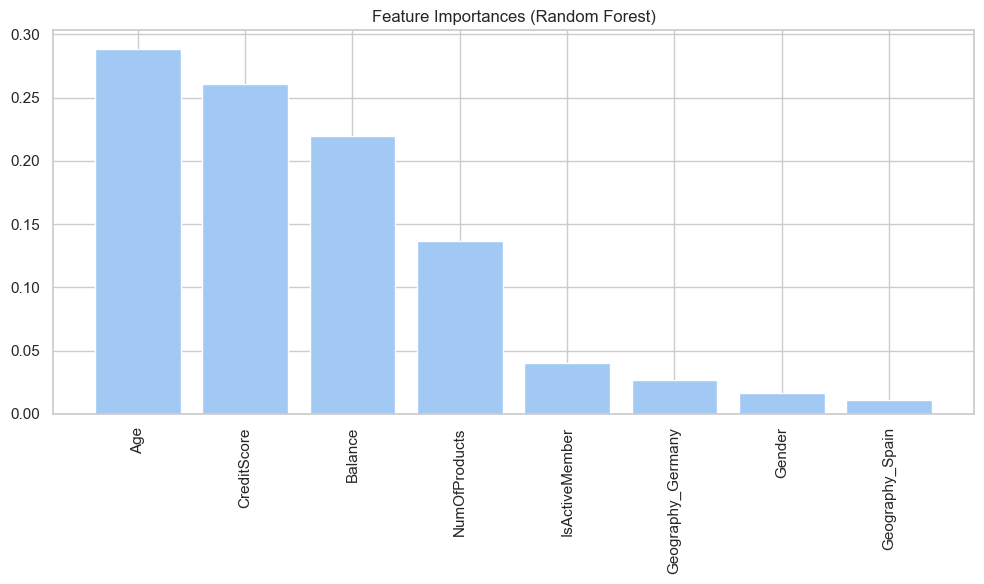

In [28]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Train model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# Keep top N important features
top_n = 8
X = X.iloc[:, indices[:top_n]]


### Recursive Feature Elimination (RFE)

In [29]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Base model
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=8)
rfe.fit(X, y)

# Selected features
selected = X.columns[rfe.support_]
print("RFE Selected Features:", selected.tolist())

# Reduce dataset
X = X[selected]


RFE Selected Features: ['Age', 'CreditScore', 'Balance', 'NumOfProducts', 'IsActiveMember', 'Geography_Germany', 'Gender', 'Geography_Spain']



Tuning: Logistic Regression
Best Params: {'C': 10, 'solver': 'liblinear'}

Tuning: Random Forest
Best Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

Tuning: Decision Tree
Best Params: {'max_depth': None, 'min_samples_split': 2}

Tuning: Support Vector Machine
Best Params: {'C': 10, 'kernel': 'rbf'}

Tuning: K-Nearest Neighbors
Best Params: {'n_neighbors': 3, 'weights': 'distance'}

========== Logistic Regression ==========
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1593
           1       0.39      0.72      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



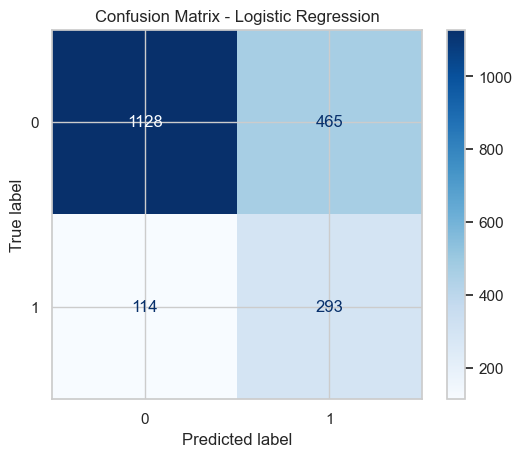


========== Random Forest ==========
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1593
           1       0.59      0.64      0.61       407

    accuracy                           0.83      2000
   macro avg       0.75      0.76      0.75      2000
weighted avg       0.84      0.83      0.84      2000



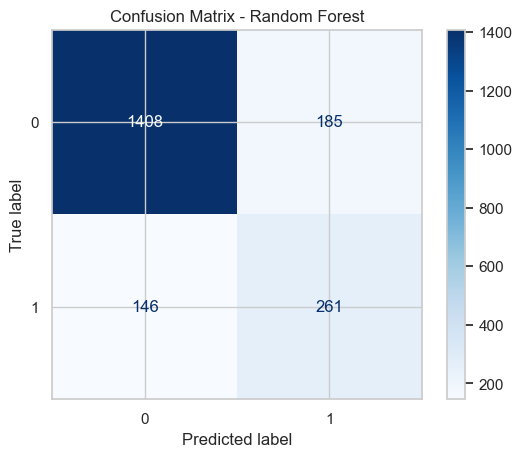


========== Decision Tree ==========
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1593
           1       0.47      0.55      0.51       407

    accuracy                           0.78      2000
   macro avg       0.68      0.70      0.68      2000
weighted avg       0.80      0.78      0.79      2000



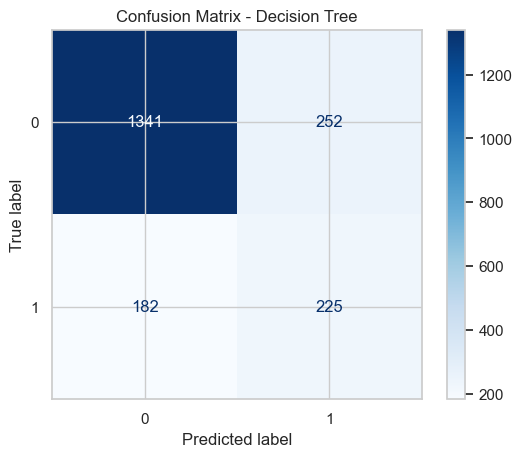


========== Support Vector Machine ==========
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1593
           1       0.51      0.76      0.61       407

    accuracy                           0.80      2000
   macro avg       0.72      0.78      0.74      2000
weighted avg       0.84      0.80      0.81      2000



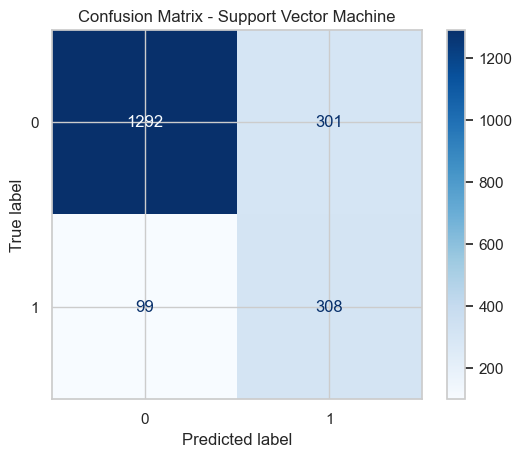


========== K-Nearest Neighbors ==========
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1593
           1       0.45      0.65      0.53       407

    accuracy                           0.77      2000
   macro avg       0.68      0.72      0.69      2000
weighted avg       0.81      0.77      0.78      2000



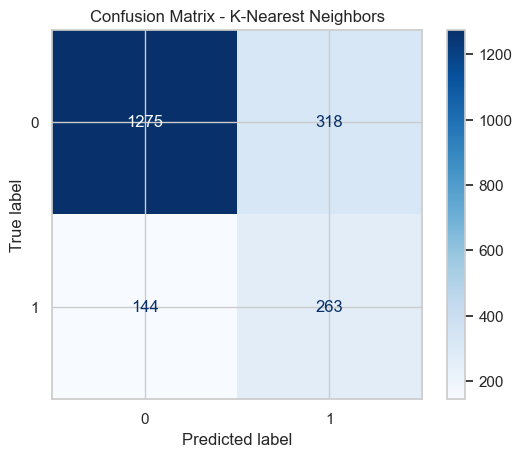

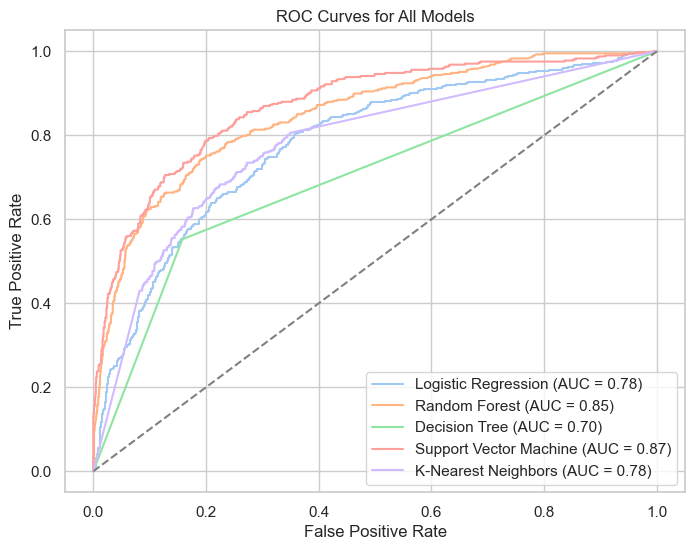

In [30]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

#Correct unbalanced classes
smote=SMOTE(random_state=2025)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Store best models
best_models = {}

for name in base_models:
    print(f"\nTuning: {name}")
    grid = GridSearchCV(base_models[name], param_grids[name], cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train_res, y_train_res)
    
    print(f"Best Params: {grid.best_params_}")
    best_models[name] = grid.best_estimator_

# Now use best_models dict in your evaluation loop

# Store ROC values for plotting
roc_data = {}

# Loop through models
for name, model in best_models.items():
    print(f"\n{'='*10} {name} {'='*10}") # Title of the model
    
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]

    # Classification Report
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # ROC Curve values
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = roc_auc_score(y_test, y_probs)
    roc_data[name] = (fpr, tpr, roc_auc)

# Plot all ROC Curves together
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.grid(True)
plt.show()


With feature selection applied, the models show some nuanced changes in performance compared to previous results. Overall accuracy remains in a similar range, with Random Forest still leading but with a slightly reduced accuracy of 83% compared to before. Interestingly, Random Forest's precision for the minority churn class drops to 59%, while recall increases slightly to 64%, suggesting the model is now catching more churn cases but with a bit more false positives.

Support Vector Machine continues to show a good balance, improving recall for the churn class to 76%, which means it’s better at identifying actual churners, though precision remains moderate. Logistic Regression and K-Nearest Neighbors also show improved recall for the minority class, but precision remains relatively low, indicating continued difficulty in minimizing false positives.

Feature selection may have helped the models focus on the most relevant variables, improving recall in some cases, but it also slightly impacted precision and overall accuracy for some models. This suggests that while feature selection helps reduce noise and potentially improves model focus, the underlying challenge of clearly distinguishing churners remains, likely due to limited predictive power in the dataset or overlapping class characteristics.

In summary, feature selection fine-tunes the models to better identify churn cases but does not drastically change the overall predictive performance, highlighting the need for richer features or more advanced modeling approaches for substantial improvements.

## Conclusions and future steps

In this analysis, we applied multiple machine learning models to predict customer churn, incorporating data cleaning, feature engineering, class balancing with SMOTE, hyperparameter tuning, and feature selection. While models like Random Forest and Support Vector Machine achieved respectable overall accuracy and recall, especially for the majority class, the challenge of accurately predicting the minority churn class persisted. Even with SMOTE and feature selection, precision for churn prediction remained moderate, indicating a trade-off between identifying churners and avoiding false positives.

This suggests that the current dataset and features provide limited discriminative power for churn behavior, and further improvements will require deeper insights.

**Future steps** should focus on:

* **Advanced feature engineering**: Incorporate domain knowledge to create new features, interaction terms, or temporal trends that better capture customer behavior patterns.
* **Experimenting with more sophisticated models**: Utilize ensemble methods like XGBoost or LightGBM, or neural networks tailored for tabular data.
* **Model calibration and threshold tuning**: Adjust classification thresholds to better balance precision and recall based on business needs.
* **Explainability and interpretability**: Use SHAP or LIME to identify key drivers of churn and validate model decisions, which can guide targeted retention strategies.

By focusing on these areas, we can improve the predictive power and practical usefulness of churn models, ultimately enabling more effective customer retention efforts.

